|First Name     |Last Name    |MtkNr.      |Due Date  |
|:-------------:|:-----------:|:----------:|:--------:|
| Yasaman    | Behravan  |12456302   | 10.11.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 1 – Image Processing Basics </h2>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 01-09-2025

<b>This file is part of the "Computer Vision Course 2025W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Gaussian-and-Laplacian-Pyramid"><li style="font-size:large;font-weight:bold">Gaussian and Laplacian Pyramid [35 Points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Build-Gaussian-Pyramid"><li style="font-size:medium">Build Gaussian Pyramid</li></a>
        <a style="color:rgb(150,100,10)" href="#Build-Laplacian-Pyramid"><li style="font-size:medium">Build Laplacian Pyramid</li></a>
        <a style="color:rgb(150,100,10)" href="#Reconstruction-of-the-Input-Image"><li style="font-size:medium">Reconstruction of the Input Image</li></a>
    </ol>    
    <a style="color:rgb(150,100,10)" href="#Camera-Calibration"><li style="font-size:large;font-weight:bold">Camera Calibration [40 Points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Read-the-Collected-Data"><li style="font-size:medium">Read the Collected Data</li></a>
        <a style="color:rgb(150,100,10)" href="#Experiment-1:-Camera-Calibration-Using-All-Data"><li style="font-size:medium">Experiment 1: Camera Calibration Using All Data</li></a>
        <a style="color:rgb(150,100,10)" href="#Experiment-2:-Camera-Calibration-on-a-Subset-of-Data"><li style="font-size:medium">Experiment 2: Camera Calibration on a Subset of Data</li></a>
        <a style="color:rgb(150,100,10)" href="#Experiment-3:-Camera-Calibration-with-Reduced-Data-Resolution"><li style="font-size:medium">Experiment 3: Camera Calibration with Reduced Data Resolution</li></a>
        <a style="color:rgb(150,100,10)" href="#Experiment-4:-Camera-Calibration-with-Added-Noise"><li style="font-size:medium">Experiment 4: Camera Calibration with Added Noise</li></a>
    </ol>
    <a style="color:rgb(150,100,10)" href="#Image-Quality-Metrics"><li style="font-size:large;font-weight:bold">Image Quality Metrics [25 Points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Adding-Noise-to-the-Image"><li style="font-size:medium">Adding Noise to the Image</li></a>
        <a style="color:rgb(150,100,10)" href="#Compute-Peak-Signal-to-Noise-Ratio-(PSNR)"><li style="font-size:medium">Compute Peak Signal to Noise Ratio (PSNR)</li></a>
</ol>


<h2 style="color:rgb(255,0,0)">Any content unrelated to the assignment, such as images, Python code (functions or classes), additional packages, or libraries, etc., will result in a deduction of 50 points.</h2>

<h1 style="color:rgb(255,0,0)">Important Note</h1>
<b>In this assignment, you may use the default parameters of any built-in function unless specified otherwise.</b>

<b style="color:rgb(255,70,0)">All cells must be executed; any unevaluated cell will not be considered, regardless of the correctness of the code.</b>

<b style="color:rgb(255,70,0)">All cells must be indexed; any non-indexed cell will not be considered.</b>

<b style="color:rgb(255,70,0)">Modifying the given code (even a single line), whether by replacing, changing, commenting, or removing, is strictly not allowed and will result in a loss of 50 points unless explicitly specified otherwise.</b>

<b style="color:rgb(255,70,0)">Redundant code, especially duplicating or copying the given code in different places, will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">Importing the same packages multiple times in different cells will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">All packages are imported in the first code cell. Any changes to this cell, including modifications, removals, or additions of packages or libraries, will result in a deduction of 50 points.</b>

<b>Always set the seed value to 123 unless specified otherwise.</b>

In [1]:
# Import all packages needed in this notebook. Any change or modify will lead to a loss of points
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os, glob
from PIL import Image
from math import log10, sqrt

if not os.path.exists('resources'): raise TypeError("Please create the resources folder and include all required files")
print('All necessary packages are successfully installed')

All necessary packages are successfully installed


<a name="Gaussian-and-Laplacian-Pyramid"></a><h2>Gaussian and Laplacian Pyramid</h2>

In this part, we will learn how to decompose an image into pyramids.

<a name="Build-Gaussian-Pyramid"></a><h3>Build a Gaussian Pyramid</h3>

<b>Exercise 1.1. [3 Points]</b>

<b>Goal:</b> Read the image to create a pyramid structure from it.

<b>Task</b>
<ul>
<li>Use the <i><b>Image.open</b></i> function from the <i><b>PIL</b></i> library to load the image <i><b>img_A1_1.jpg</b></i> from the <i><b>resources</b></i> folder.</li>
<li>Resize the image to $256 \times 256$.</li>
<li>Convert the image to a <i><b>NumPy array</b></i> and normalize it by dividing by <i><b>255.0</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Divide by <i><b>255.0</b></i> to ensure that the image data is stored as floating-point values.</li>
</ul>

In [2]:
# code goes here
image=Image.open('resources/img_A1_1.jpg')
image = image.resize((256, 256))
image_np = np.array(image)
image_np = image_np / 255.0

<b>Exercise 1.2. [1 Points]</b>

<b>Goal:</b> Show the image that is supposed to be used in the next steps.

<b>Task</b>
<ul>
<li>Use the <i><b>plt.imshow</b></i> function to display the image.</li>
<li>Hide the <i><b>axes</b></i> of the image.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>plt.imshow</b></i> function is part of the <i><b>matplotlib</b></i> library.</li>
</ul>

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

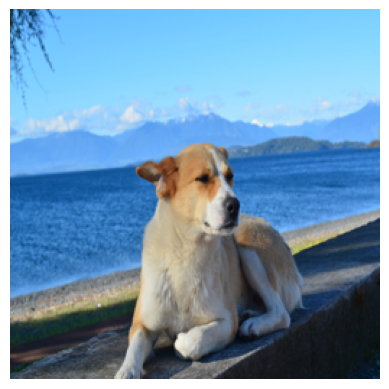

In [3]:
# code goes here
plt.imshow(image_np)
plt.axis('off')

<b>Exercise 1.3. [2 Points]</b>

<b>Goal:</b> Create a function to downsample the image and decompose it.

<b>Task</b>
<ul>
<li>Complete the <i><b>downsample</b></i> function.</li>
<li>Use <i><b>pyrDown</b></i> to blur the image (from Ex. 1.1) and downsample it.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>pyrDown</b></i> function is part of the <i><b>OpenCV</b></i> library.</li>
<li>Do not modify the <i><b>gauss_Img</b></i> variable, as it will be used later.</li>
</ul>

In [4]:
def downsample(image_TO_DownSample, level_Num=2):
    gauss_Img = image_TO_DownSample.copy()
    gauss_pyramid = [gauss_Img] 
    for i in range(level_Num): 
        
        # code goes here
        gauss_Img = cv.pyrDown(gauss_Img)
        
        gauss_pyramid.append(gauss_Img)
    return gauss_pyramid

<b>Exercise 1.4. [2 Points]</b>

<b>Goal:</b> Create a Gaussian pyramid for our image.

<b>Task</b>
<ul>
<li>Use the <i><b>downsample</b></i> function to create the pyramid.</li>
<li>Provide our <i><b>image</b></i> obtained in <i><b>Exercise 1.1</b></i> as inputs.</li>
<li>Set the number of levels to <i><b>8</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure to run the cell that defines the <i><b>downsample</b></i> function before using it.</li>
</ul>

In [5]:
# code goes here
gaussian_pyramid = downsample(image_np, level_Num=8)

<b>Exercise 1.5. [2 Points]</b>

<b>Goal:</b> Show the pyramid.

<b>Task</b>
<ul>
<li>Use the <i><b>show_pyramid</b></i> function to display the Gaussian pyramid.</li>
<li>Provide the Gaussian pyramid obtained in <i><b>Exercise 1.4</b></i> as input.</li>
<li>Set the title to <i><b>'Gaussian Pyramid'</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure to run the cell that defines the <i><b>show_pyramid</b></i> function before using it.</li>
</ul>

In [6]:
def show_pyramid(pyramid_TOShow, title):
    plt.figure(figsize=(13,2))
    n = len(pyramid_TOShow)
    for i, p in enumerate(pyramid_TOShow):
        plt.subplot(1,n,i +1)    
        plt.title(str(p.shape[0]) + 'x' + str(p.shape[1]))
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(p)
    plt.suptitle(title, size=15)
    plt.tight_layout()
    plt.show()

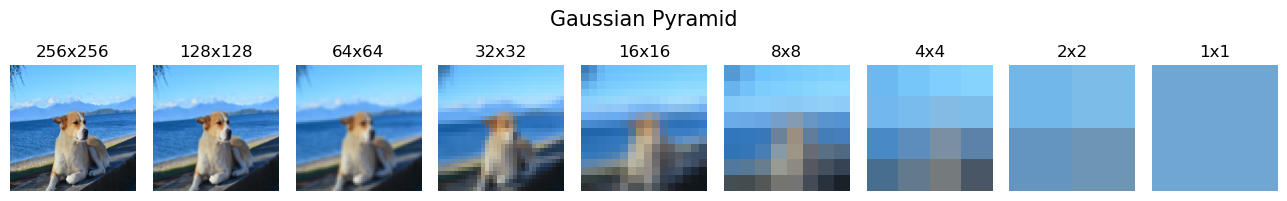

In [7]:
# code goes here
show_pyramid(gaussian_pyramid, 'Gaussian Pyramid')

<a name="Build-Laplacian-Pyramid"></a><h2>Build a Laplacian Pyramid</h2>

<b>Exercise 1.6. [2 Points]</b>

<b>Goal:</b> We need a function to upsample the layers again to construct the Laplacian pyramid layers.

<b>Task</b>
<ul>
<li>Complete the <i><b>upsample</b></i> function.</li>
<li>Use <i><b>pyrUp</b></i> to upsample the image and then blur it.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>pyrUp</b></i> function is part of the <i><b>OpenCV</b></i> library.</li>
<li>Do not modify the <i><b>GE</b></i> variable, as it will be used later.</li>
</ul>

In [8]:
def upsample(gauss_Layers):

    lp = [gauss_Layers[-1] ]
    for i in range(len(gauss_Layers) - 1, 0, -1):
        
        # code goes here
        GE = cv.GaussianBlur(cv.pyrUp(gauss_Layers[i]), (5,5), 0)
        
        lapLayer = cv.subtract(gauss_Layers[i - 1], GE)
        lp.append(lapLayer)
        
    return lp

<b>Exercise 1.7. [2 Points]</b>

<b>Goal:</b> Upsample the layers to construct the Laplacian pyramid layers.

<b>Task</b>
<ul>
<li>Use the <i><b>upsample</b></i> function to create the Laplacian pyramid layers.</li>
<li>Provide the Gaussian pyramid obtained in Exercise 1.4 as inputs.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure to run the cell that defines the <i><b>laplacian_pyramid</b></i> function before using it.</li>
</ul>

In [9]:
# code goes here
laplacian_pyramid = upsample(gaussian_pyramid)

<b>Exercise 1.8. [1 Points]</b>

<b>Goal:</b> Display the Laplacian pyramid.

<b>Task</b>
<ul>
<li>Use the <i><b>show_pyramid</b></i> function to display the Laplacian pyramid. Do not rewrite the function; just call it.</li>
<li>Provide the Laplacian pyramid created in Exercise 1.7 as input.</li>
<li>You can set the title to <i><b>'Laplacian Pyramid'</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Do not rewrite the <i><b>show_pyramid</b></i> function; just call it.</li>
</ul>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11510527615438759..0.09583704193125608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.34289286919875894..0.17124899709639607].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27755207778911684..0.19772685494880016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3010957055899128..0.245006856284115].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2952389564621452..0.27750462073521814].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3310164580325934..0.3242124291665581].
Clipping input d

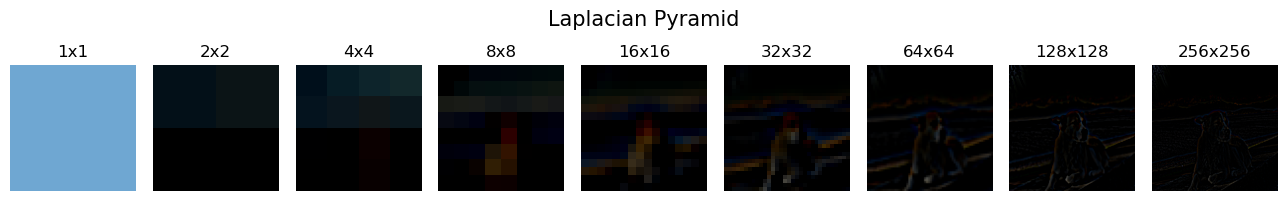

In [10]:
# code goes here
show_pyramid(laplacian_pyramid, 'Laplacian Pyramid')

<a name="Reconstruction-of-the-Input-Image"></a><h2>Reconstruction of the Input Image</h2>

<b>Exercise 1.9. [2 Points]</b>

<b>Goal:</b> Compose all Laplacian pyranid layers again into a single image.

<b>Task</b>
<ul>
<li>Use the <i><b>reconstruct_Image_from_pyramid</b></i> function to combine all layers into a single image.</li>
<li>Complete the <i><b>reconstruct_Image_from_pyramid</b></i> function by using the <i><b>pyrUp</b></i> function from the <i><b>OpenCV</b></i> library.</li>
<li>Provide the Laplacian pyramid images obtained in Exercise 1.7 as inputs.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure to run the cell that defines the <i><b>reconstruct_Image_from_pyramid</b></i> function before using it.</li>
<li>Do not modify the <i><b>reconstructed_img</b></i> variable, as it will be used later.</li>
</ul>

In [11]:
def reconstruct_Image_from_pyramid(lap_pyramid_to_Reconstruct):
    
    reconstructed_img = lap_pyramid_to_Reconstruct[0]  # start from smallest Gaussian

    for i in range(len(lap_pyramid_to_Reconstruct)-1):
        
        # code goes here
        reconstructed_img = cv.pyrUp(reconstructed_img)
        
        
        reconstructed_img = cv.add(lap_pyramid_to_Reconstruct[i+1], reconstructed_img)
        
    return reconstructed_img

In [12]:
# code goes here
reconstructed_img = reconstruct_Image_from_pyramid(laplacian_pyramid)

<b>Exercise 1.10. [1 Points]</b>

<b>Goal:</b> Display the reconstructed resulting image.

<b>Task</b>
<ul>
<li>Use the <i><b>plt.imshow</b></i> function to display the resulting image from Ex 1.9.</li>
<li>Hide the <i><b>axes</b></i> of the image.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>plt.imshow</b></i> function is part of the <i><b>matplotlib</b></i> library.</li>
</ul>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10585621851015428..1.1087805266082582].


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

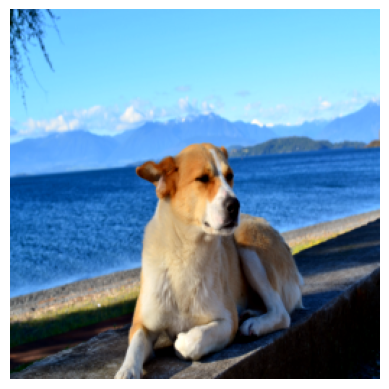

In [13]:
# code goes here
plt.imshow(reconstructed_img)
plt.axis('off')

<b>Exercise 1.11. [5 Points]</b>

<b>Goal:</b> Modify the last frequency band (top layer) of the Laplacian.

<b>Task</b>
<ul>
<li>Change the top layer from Exercise 1.7 by swapping the first and third color channels.</li>
<li>Reconstruct the image based on this modification using the <i><b>reconstruct_Image_from_pyramid</b></i> function.</li>
<li>Display the resulting image after the modification using the <i><b>plt.imshow</b></i> function.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The image below demonstrates the change.</li>
<li>Do not rewrite the <i><b>reconstruct_Image_from_pyramid</b></i> function; just call it.</li>
</ul>
<a></a><h3 style="color:rgb(100,0,200)">Here is the demonstraton of the change in the last layer</h3>
<img src="resources/demos_A1.jpg" alt="Image not found!"/>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30666905154048885..1.2315179686394067].


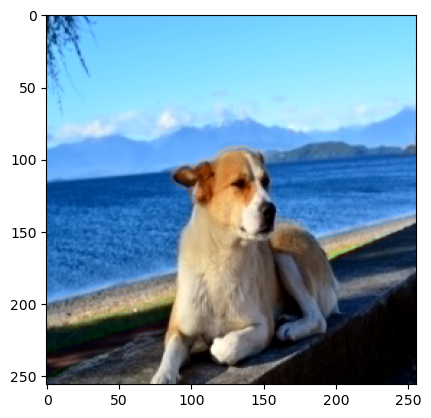

In [14]:
# code goes here
laplacian_pyramid[-1] = laplacian_pyramid[-1][:, :, [2, 1, 0]]
plt.imshow(reconstruct_Image_from_pyramid(laplacian_pyramid))

<b>Exercise 1.12. [12 Points]</b>

<b>Question</b>
<ul> 

<li>Q1) For bulding a Gaussian pyramid, Gassian filter kernels are usualy parameterized with the parameter "sigma" (see link below for explanation). What is the impact to the image decompostion with the Laplacian image pyramid, if we change this parameter (e.g., making it larger or smaller)?</li>
<li>Q2) In Exercise 1.11, we changed the top layer in the Laplacian pyramid from light blue to brown by swapping the first and third color channels. Please explain this effect in terms of frequency decomposition.</li>

</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<span style="color:rgb(200,10,10)">Sigma explanation link: [Here](https://news.mit.edu/2012/explained-sigma-0209)</span>

<b>The explanation goes here:</b>

A1) If σ is larger, the image gets more blurred before downsampling, so the pyramid loses more fine details.
If σ is smaller, less blur is applied, so more details stay but you may get aliasing.

A2) Swapping the first and third color channels in the top Laplacian layer changes only the high-frequency color details. This makes edges and textures shift in color, but the overall image colors stay mostly the same.

<a name="Camera-Calibration"></a><h2>Camera Calibration</h2>

In this section, we learn how to correct lens distortion.

<a name="Read-the-Collected-Data"></a><h3>Read the Collected Data</h3>

<b>Exercise 2.1. [1 Points]</b>

<b>Goal:</b> Read all images from a given folder.

<b>Task</b>
<ul>
<li>Download the <i><b>img_Calib</b></i> zip folder from the Google link provided below, and place it in the <i><b>resources</b></i> directory.</li>
<li>Use the <i><b>glob</b></i> function to read the <i><b>paths</b></i> of all <i><b>.png</b></i> images from the <i><b>img_Calib</b></i> folder located inside the <i><b>resources</b></i> directory. Please make sure to unzip the folder first.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>glob</b></i> function is part of the <i><b>glob</b></i> library.</li>
</ul>

<span style="color:rgb(200,10,10)">Google Drive link: [Here](https://drive.google.com/file/d/1GGEBdQ0cf-2nqIw-mJ1q5eo17ePB9ZXn/view?usp=sharing)</span>

In [24]:
# code goes here
image_paths = glob.glob('resources/img_Calib/*.png')

<b>Exercise 2.2. [1 Points]</b>

<b>Goal:</b> Read all images and store them in a single list.

<b>Task</b>
<ul>
<li>Run the <i><b>read_All_Images</b></i> function to read all images and store them in a <i><b>list</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>read_All_Images</b></i> function returns a parameter containing all the images read using the OpenCV library.</li>
</ul>

In [25]:
def read_All_Images(all_imgs_Exp1):
    List_all_images_Exp1 = []
    for i, fname in enumerate(all_imgs_Exp1):
        List_all_images_Exp1.append(cv.imread(fname))
    return List_all_images_Exp1   

In [33]:
# code goes here
images = read_All_Images(image_paths)
all_images = images

<a name="Experiment-1:-Camera-Calibration-Using-All-Data"></a><h3>Experiment 1: Camera Calibration Using All Images</h3>

<b>Exercise 2.3. [4 Points]</b>

<b>Goal:</b> Obtain the corners of the calibration pattern in the imags as our features.

<b>Task</b>
<ul>
<li>Complete the provided <i><b>find_Corners</b></i> function below.</li>
<li>Use the <i><b>findChessboardCorners</b></i> function from the OpenCV library to compute the corners.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>findChessboardCorners</b></i> function is part of the OpenCV library.</li>
<li>Keep the variable names <i><b>ret</b></i> and <i><b>corners</b></i> unchanged, as they will be used in the next steps.</li>
<li><span style="color:rgb(180,10,10)">Modifications to the <i><b>find_Corners</b></i> function (except for completing the missing parts) are not allowed.</span></li>
<li><span style="color:rgb(180,10,10)">The result will be displayed in a separate window.</span></li>
</ul>

In [34]:
def find_Corners (images, chessboard_size, square_size=1):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    objp = np.zeros((chessboard_size[0]*chessboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
    objp *= square_size
    
    objpoints, imgpoints = [], []  # Arrays to store object points and image points
    
    for i, image in enumerate(images):
        imgcopy = image.copy()
        gray = cv.cvtColor(imgcopy, cv.COLOR_BGR2GRAY)

        # code goes here    
        ret, corners = cv.findChessboardCorners(gray, chessboard_size, None)
    
        if ret:
            objpoints.append(objp)
            
            corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
            imgpoints.append(corners2)
    
            cv.drawChessboardCorners(imgcopy, chessboard_size, corners, ret)
            cv.imshow(f"Corners in image {i+1}", imgcopy)
            cv.waitKey(250)
    cv.destroyAllWindows()

    print(f"All {len(images)} IMAGES are DONE in this Exercise")
    return objpoints, imgpoints

<b>Exercise 2.4. [1 Points]</b>

<b>Goal:</b>  Use the <i><b>find_Corners</b></i> function to compute all corners.

<b>Task</b>
<ul>
<li>Use the provided <i><b>find_Corners</b></i> function to compute the corners.</li>
<li>Provide all the images that we read in <i><b>Exercise 2.2</b></i>.</li>
<li>Specify the correct number of rows and columns of the chessboard. In addition, note that the size of each square is 5 cm.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>find_Corners</b></i> function returns two parameters.</li>
<li>The parameter <i><b>square_size</b></i> in the <i><b>find_Corners</b></i> function must be in millimeters.</li>
</ul>

In [35]:
# code goes here
objpoints, imgpoints = find_Corners(images, (7,8), 50)

All 40 IMAGES are DONE in this Exercise


<b>Exercise 2.5. [2 Points]</b>

<b>Goal:</b> Calibrate the camera.

<b>Task</b>
<ul>
<li>Use the <i><b>calibrateCamera</b></i> function from the OpenCV library to calibrate the camera.</li>
<li>Provide the <i><b>object points</b></i> and <i><b>image points</b></i> obtained from Exercise 2.3.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>You need to provide the correct <i><b>image size</b></i>.</li>
</ul>

In [36]:
# code goes here
h, w = all_images[0].shape[:2]
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (w, h), None, None)

<b>Exercise 2.6. [1 Points]</b>

<b>Goal:</b> Print the outputs.

<b>Task</b>
<ul>
<li>Print the <i><b>camera matrix</b></i> and <i><b>distortion coefficients</b></i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Simply use the <i><b>print</b></i> function.</li>
</ul>

In [37]:
# code goes here
print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

Camera matrix:
 [[1.07836078e+03 0.00000000e+00 5.20571605e+02]
 [0.00000000e+00 1.08350296e+03 5.96460352e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[ 4.76934062e-02 -6.71469234e-01  2.73929908e-03 -4.61227981e-03
   3.54171543e+00]]


<b>Exercise 2.7. [3 Points]</b>

<b>Goal:</b> Compute the new camera matrix.

<b>Task</b>
<ul>
<li>Use the <i><b>getOptimalNewCameraMatrix</b></i> function from the OpenCV library to compute the new camera matrix.</li>
<li>Provide the <i><b>camera matrix</b></i> and <i><b>distortion coefficients</b></i> obtained from Ex. 2.4.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>You need to provide the correct <i><b>image width</b></i> and <i><b>image height</b></i>.</li>
</ul>

In [38]:
# code goes here
new_camera_matrix, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

<b>Exercise 2.8. [2 Points]</b>

<b>Goal:</b> Compute the undistorted image.

<b>Task</b>
<ul>
<li>Use the <i><b>undistort</b></i> function from the OpenCV library to compute the undistorted image.</li>
<li>Provide the test-set image, the camera matrix, the distortion coefficients, and the new camera matrix.</li>
<li>Use the first image in the list returned by the <i><b>read_All_Images</b></i> function in <i><b>Exercise 2.2</b></i> as the test-set image, and convert its color space from BGR to RGB. </li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Do not read the image again; just convert its color space from BGR to RGB.</li>
</ul>

In [39]:
# code goes here
test_img = all_images[0]                      
undistorted = cv.undistort(test_img, mtx, dist, None, new_camera_matrix)
undistorted_rgb = cv.cvtColor(undistorted, cv.COLOR_BGR2RGB)

<b>Exercise 2.9. [1 Points]</b>

<b>Goal:</b> Show the results.

<b>Task</b>
<ul>
<li>Use the <i><b>visualize_Calibration_Res</b></i> function to visualize the results.</li>
<li>Provide the test and undistorted images from Exercise 2.7.</li>
<li>Provide the region of interest from Exercise 2.6.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure to run the cell that defines the <i><b>visualize_Calibration_Res</b></i> function before using it.</li>
</ul>

In [40]:
def visualize_Calibration_Res(input_img, undistorted_img, region_Interest):
    
    x, y, w, h = region_Interest   # crop the image
    undistorted_img = undistorted_img[y:y+h, x:x+w]

    imagess = [input_img, undistorted_img]
    titles = ['Input Image', 'undistorted Image']
    plt.figure(figsize=(15,8))
    n = 2
    for i, p in enumerate(imagess):
        plt.subplot(1,n, (i+1) )    
        plt.title( titles[i])
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(p)
    plt.suptitle('Result', size=15)
    plt.tight_layout()
    plt.show()

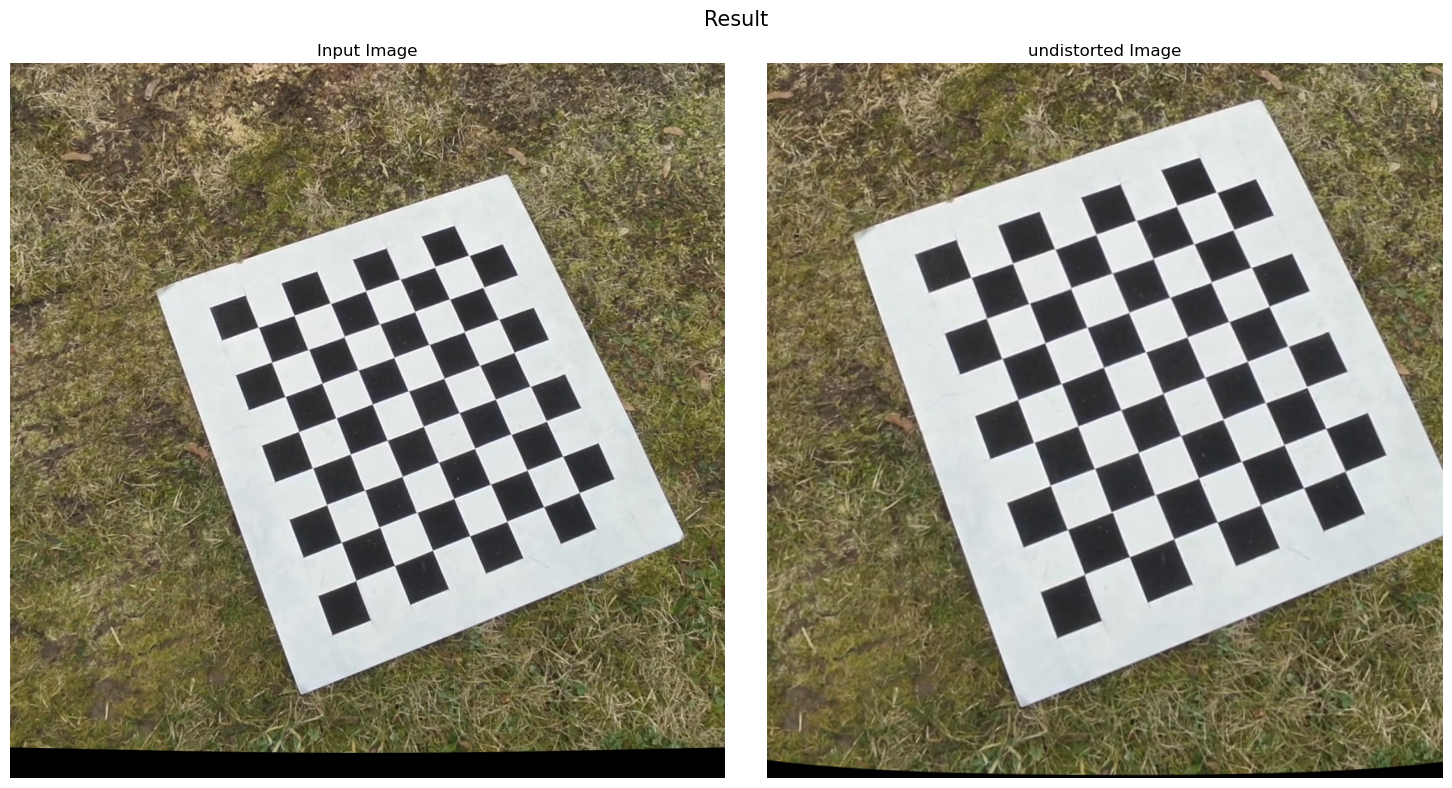

In [41]:
# code goes here
visualize_Calibration_Res(
    cv.cvtColor(all_images[0], cv.COLOR_BGR2RGB), undistorted_rgb, roi)

<a name="Experiment-2:-Camera-Calibration-on-a-Subset-of-Data"></a><h3>Experiment 2: Camera Calibration on a Subset of Images</h3>

<b>Exercise 2.10. [4 Points]</b>

<b>Goal:</b> Use a smaller number of images from the dataset instead of all images.

<b>Task</b>
<ul>
<li>In Exercise 2.2, modify the <i><b>read_All_Images</b></i> function so that it reads every twentieth image. For example, read the first image, then skip the next nineteen, and so on.</li>
<li>The modified <i><b>read_All_Images</b></i> function should take its input from the output of Exercise 2.1 (do not read the images again).</li>
<li>Use this reduced set of images to complete <i><b>all</b></i> calibration steps, as was done in <i><b>Experiment 1</b></i> (repeat all Exercises from 2.2 to 2.9).</li>
</ul>

<b>Hint</b>
<ul> 
<li>You can rewrite the <i><b>read_All_Images</b></i> function with the required modifications.</li>
<li><span style="color:rgb(180,10,10)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

Number of selected images: 2
All 2 IMAGES are DONE in this Exercise
All subset images are DONE in this Exercise
New camera matrix (K):
 [[570.56647249   0.         472.13894676]
 [  0.         547.24442149 492.22974899]
 [  0.           0.           1.        ]]
New distortion coefficients:
 [ 0.01781176 -0.01739896 -0.00092139 -0.00460968  0.00171239]


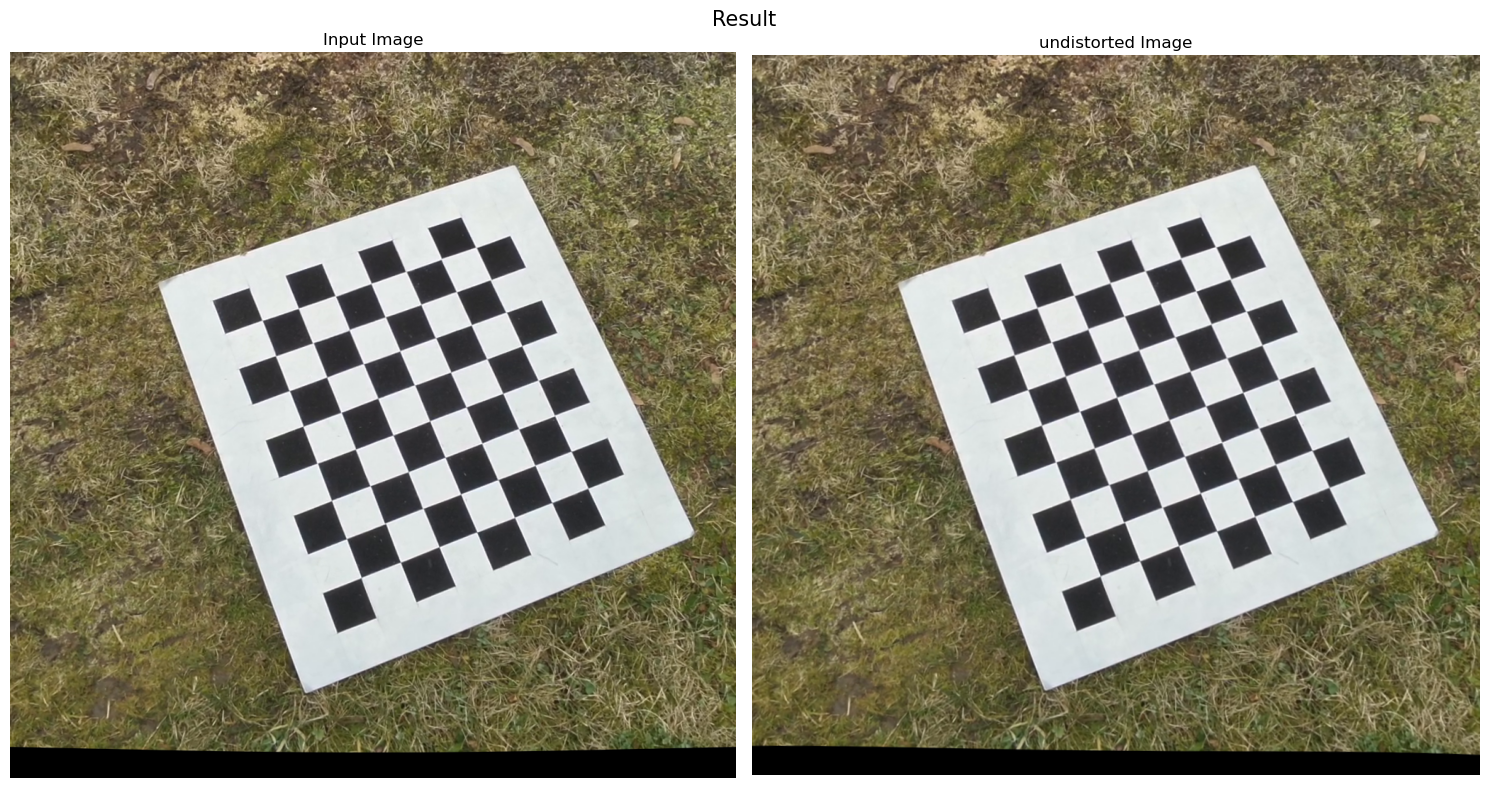

In [44]:
# code goes here
def read_All_Images_Subset_any(items, step=20):
    out = []
    for i, it in enumerate(items):
        if i % step != 0:
            continue
        if isinstance(it, str):       
            img = cv.imread(it)
        else:                      
            img = it
        if img is not None:
            out.append(img)
    return out
source = images
all_images_ex2_10 = read_All_Images_Subset_any(source, step=20)
print("Number of selected images:", len(all_images_ex2_10))
assert len(all_images_ex2_10) > 0, "No images in the subset."

chessboard_size_ex2_4 = (7, 8)         
square_size_mm_ex2_4 = 50            

objpoints_ex2_10, imgpoints_ex2_10 = find_Corners(
    all_images_ex2_10,
    chessboard_size_ex2_4,
    square_size_mm_ex2_4
)
assert len(objpoints_ex2_10) > 0 and len(imgpoints_ex2_10) > 0, "Corner detection failed."

h_10, w_10 = all_images_ex2_10[0].shape[:2]

ret_10, mtx_10, dist_10, rvecs_10, tvecs_10 = cv.calibrateCamera(
    objpoints_ex2_10,
    imgpoints_ex2_10,
    (w_10, h_10),
    None, None
)
print("All subset images are DONE in this Exercise")
print("New camera matrix (K):\n", mtx_10)
print("New distortion coefficients:\n", dist_10.ravel())

new_mtx_10, roi_10 = cv.getOptimalNewCameraMatrix(mtx_10, dist_10, (w_10, h_10), 1, (w_10, h_10))
test_bgr = all_images_ex2_10[0]
undist_bgr = cv.undistort(test_bgr, mtx_10, dist_10, None, new_mtx_10)
test_rgb   = cv.cvtColor(test_bgr,   cv.COLOR_BGR2RGB)
undist_rgb = cv.cvtColor(undist_bgr, cv.COLOR_BGR2RGB)
visualize_Calibration_Res(test_rgb, undist_rgb, roi_10)

<b>Exercise 2.11. [4 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) Look at the results from <i><b>Exercise 2.9</b></i> and <i><b>Exercise 2.10</b></i>. Why are we unable to correct for the lens distortion when we reduce the number of images in <i><b>Exercise 2.10</b></i>?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) When we reduce the number of calibration images, the camera parameters become under-constrained and less accurate.
With insufficient viewpoints, distortion coefficients cannot be reliably estimated, so the lens distortion cannot be properly corrected.

<a name="Experiment3:-Camera-Calibration-with-Reduced-Data-Resolution"></a><h3>Experiment 3: Camera Calibration with Reduced Image Resolution</h3>

<b>Exercise 2.12. [4 Points]</b>

<b>Goal:</b> Use lower-resolution images instead of the full resolution.

<b>Task</b>
<ul>
<li>In Exercise 2.2, modify the <i><b>read_All_Images</b></i> function so that it reduces the resolution from $1024\times1024$ to <i><b>$120\times120$</b></i>.</li>
<li>The modified <i><b>read_All_Images</b></i> function should take its input from the output of Exercise 2.1 (do not read the images again).</li>
<li>Use these lower-resolution images to complete all calibration steps, as was done in <i><b>Experiment 1</b></i> (repeat all Exercises from 2.2 to 2.9).</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>You can rewrite the <i><b>read_All_Images</b></i> function with the required modifications.</li>
<li><span style="color:rgb(180,10,10)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

40
All 40 IMAGES are DONE in this Exercise
Corners found in: 37 low-res images


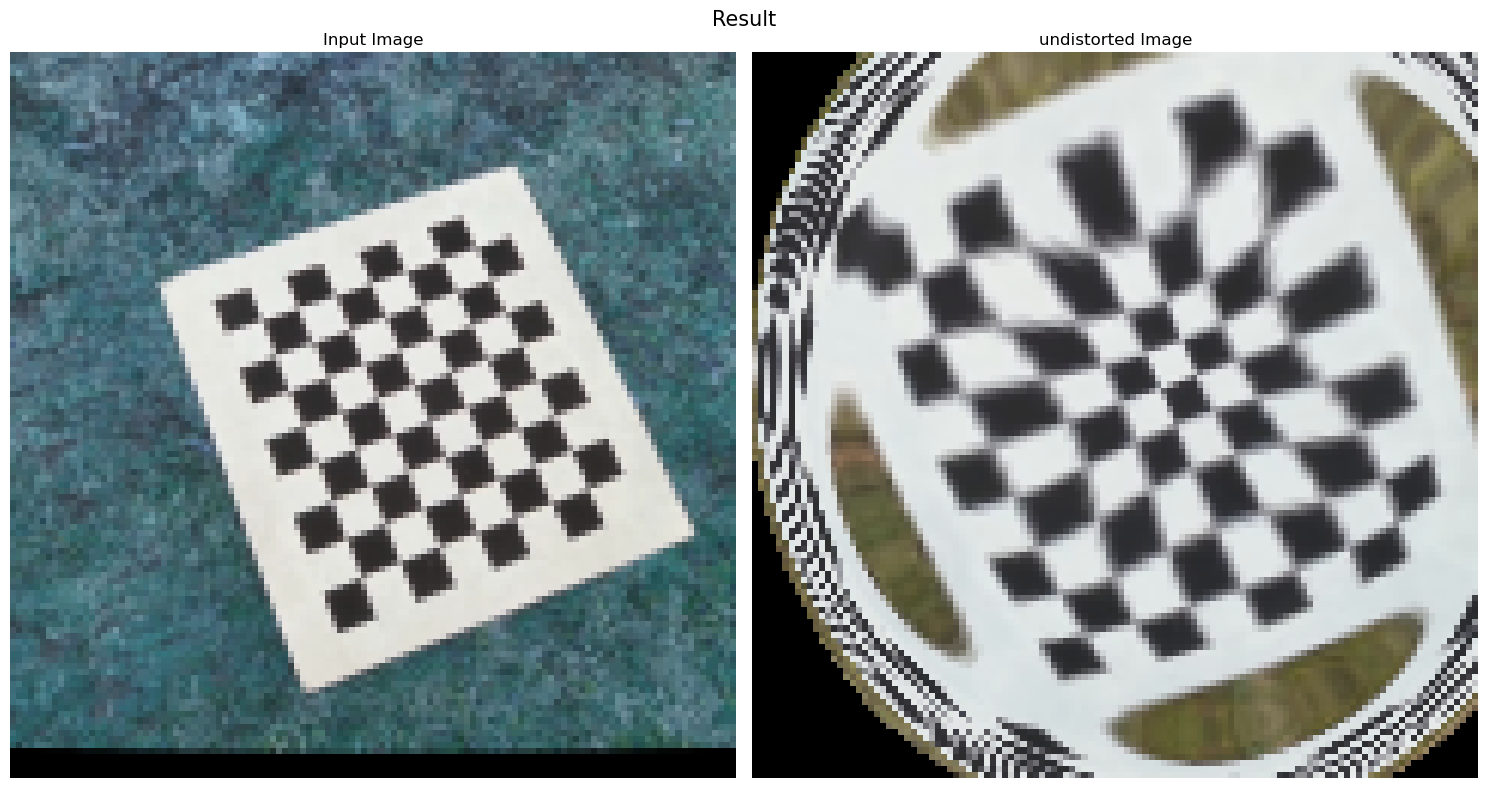

In [45]:
# code goes here
def read_All_Images_LowRes(image_list, new_size=(120, 120)):
    resized_imgs = []
    for img in image_list:
        low = cv.resize(img, new_size, interpolation=cv.INTER_AREA)
        resized_imgs.append(low)
    return resized_imgs
lowres_images = read_All_Images_LowRes(images)
print(len(lowres_images))
objpoints_low, imgpoints_low = find_Corners(
    lowres_images,
    chessboard_size_ex2_4,
    square_size_mm_ex2_4
)
print("Corners found in:", len(objpoints_low), "low-res images")

h, w = lowres_images[0].shape[:2]

ret, K_low, dist_low, rvecs_low, tvecs_low = cv.calibrateCamera(
    objpoints_low, imgpoints_low, (w, h), None, None
)
newK_low, roi_low = cv.getOptimalNewCameraMatrix(
    K_low, dist_low, (w, h), 1, (w, h)
)
undist_low = cv.undistort(lowres_images[0], K_low, dist_low, None, newK_low)
visualize_Calibration_Res(lowres_images[0], cv.cvtColor(undist_low, cv.COLOR_BGR2RGB), roi_low)

<b>Exercise 2.13. [4 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) Why does lens undistortion not work in this case?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) Undistortion does not work because low-resolution images give unreliable corner detection, leading to incorrect calibration parameters. Using wrong parameters causes the undistortion to fail and warp the image.

<a name="Experiment-4:-Camera-Calibration-with-Added-Noise"></a><h3>Experiment 4: Camera Calibration with Added Image Noise</h3>

<b>Exercise 2.14. [4 Points]</b>

<b>Goal:</b> Add noise to the images and explore lens undistortion.

<b>Task</b>
<ul>
<li>The <i><b>read_All_Images_V2</b></i> function is prepared to add noise to our RGB image data.</li>
<li>The <i><b>read_All_Images_V2</b></i> function should take its input from the output of Exercise 2.1 (do not read the images again).</li>
<li>Use these noisy images to complete all calibration steps, as was done in <i><b>Experiment 1</b></i> (repeat all Exercises from 2.2 to 2.9)..</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Do not rewrite the <i><b>read_All_Images_V2</b></i> function but invoke it.</li>
<li>Make sure to run the cell that defines the <i><b>read_All_Images_V2</b></i> function before using it.</li>
<li><span style="color:rgb(180,10,10)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

In [46]:
def read_All_Images_V2(all_imgs_Exp4):
    List_all_images_Exp4 = []
    for i, fname in enumerate(all_imgs_Exp4):
        img_temp = cv.imread(fname)

        mean, var = 0, 30 
        sigma = var ** 0.85
        gaussian = np.random.normal(mean, sigma, (1024, 1024))
        noisy_image = np.zeros(img_temp.shape, np.float32)

        noisy_image[:, :, 0] = img_temp[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img_temp[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img_temp[:, :, 2] + gaussian

        cv.normalize(noisy_image, noisy_image, 0, 255, cv.NORM_MINMAX, dtype=-1)
        noisy_image = noisy_image.astype(np.uint8)

        List_all_images_Exp4.append( noisy_image )
    return List_all_images_Exp4

All 40 IMAGES are DONE in this Exercise
Corners found in: 40 noisy images.

Calibration (noisy) done.
Camera matrix (K):
 [[1.10025790e+03 0.00000000e+00 5.20657164e+02]
 [0.00000000e+00 1.10676331e+03 5.96523745e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [ 4.62730807e-02 -6.77445383e-01  2.77629602e-03 -4.99462777e-03
  3.78547480e+00]


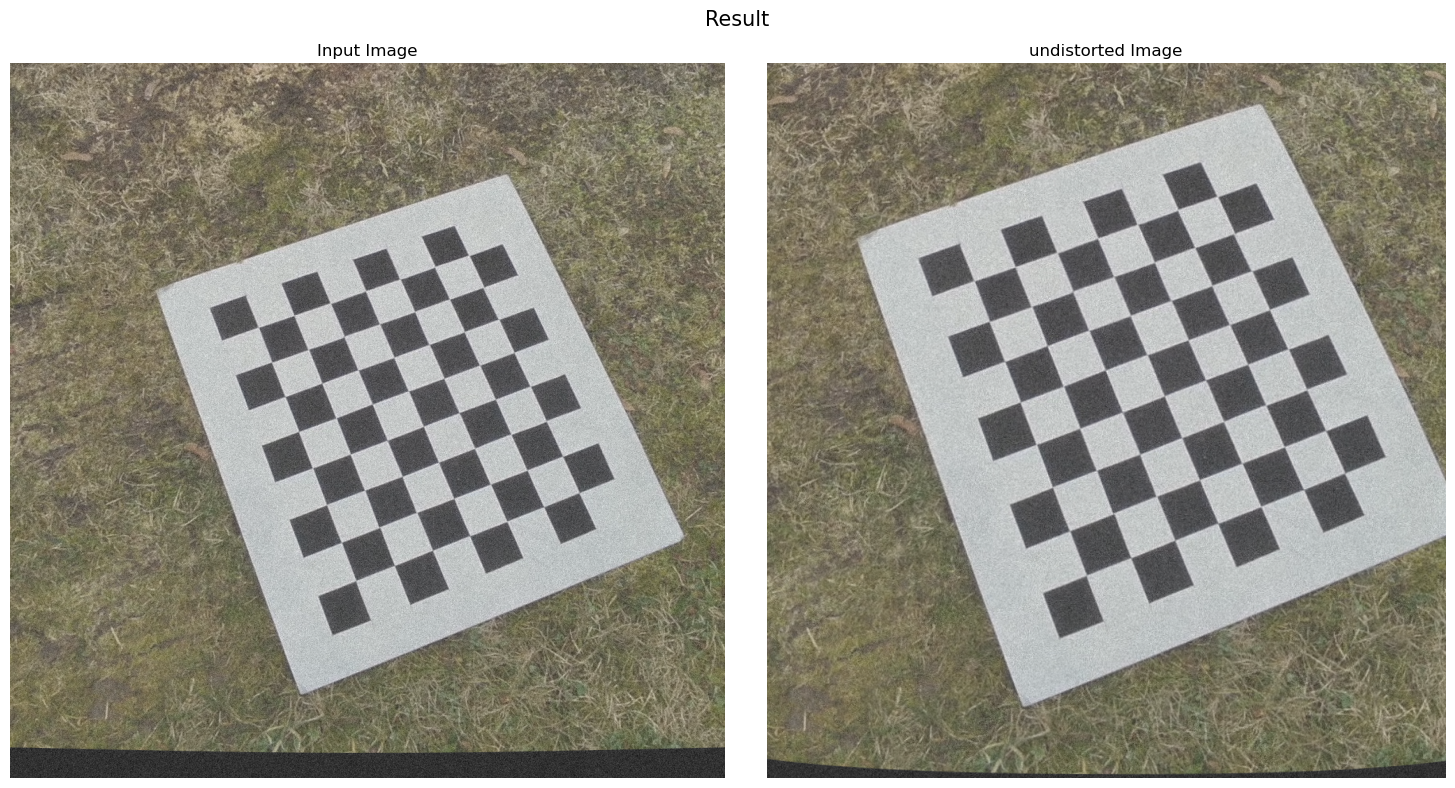

In [47]:
# code goes here
noisy_images = read_All_Images_V2(image_paths)
obj4, img4 = find_Corners(noisy_images, (7, 8), 50)
print("Corners found in:", len(obj4), "noisy images.")
assert len(obj4) > 0 and len(img4) > 0, "Corner detection failed on noisy images."

h4, w4 = noisy_images[0].shape[:2]
ret4, K4, dist4, rvec4, tvec4 = cv.calibrateCamera(obj4, img4, (w4, h4), None, None)

print("\nCalibration (noisy) done.")
print("Camera matrix (K):\n", K4)
print("Distortion coefficients:\n", dist4.ravel())

newK4, roi4 = cv.getOptimalNewCameraMatrix(K4, dist4, (w4, h4), 1, (w4, h4))
und4 = cv.undistort(noisy_images[0], K4, dist4, None, newK4)
inp_rgb  = cv.cvtColor(noisy_images[0], cv.COLOR_BGR2RGB)
und4_rgb = cv.cvtColor(und4, cv.COLOR_BGR2RGB)
visualize_Calibration_Res(inp_rgb, und4_rgb, roi4)

<b>Exercise 2.15. [4 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) In Exercise 2.14, why does noise not affect lens undistortion?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) Noise does not significantly affect lens undistortion because the distortion model depends on the geometric properties of the lens, not on pixel-level intensity variations. Even with noise, the estimated camera matrix and distortion coefficients remain unchanged, so the undistortion transformation works the same.

<a name="Image-Quality-Metrics"></a><h2>Image Quality Metrics</h2>

In this part, we learn how to determine signal to noise ratio in images.

<a name="Adding-Noise-to-the-Image"></a><h3>Adding Noise to the Image</h3>

<b>Exercise 3.1. [2 Points]</b>

<b>Goal:</b> Read the image to build our test-set based on it.

<b>Task</b>
<ul>
<li>Use the <i><b>imread</b></i> function from the <i><b>OpenCV</b></i> library to read the image <i><b>img_A1_3.jpg</b></i> from the <i><b>resources</b></i> folder.</li>
<li>Convert the color system from <i><b>BGR to grayscale</b></i>.</li>
<li>Display the grayscale image.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure that the intended image is in the <i><b>resources</b></i> folder.</li>
</ul>

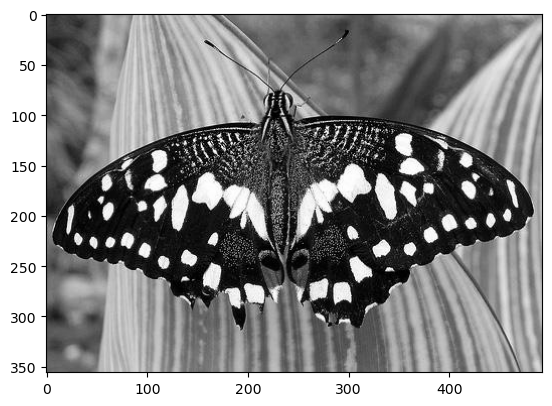

In [48]:
# code goes here
img = cv.imread('resources/img_A1_3.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

<b>Exercise 3.2. [2 Points]</b>

<b>Goal:</b> Create random noise.

<b>Task</b>
<ul>
<li>Use <i><b>NumPy</b></i> to generate normal random noise.</li>
<li>Set the mean, sigma, and size to 0, 22, and the same as the image size, respectively.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The image size here is after converting from BGR to grayscale.</li>
</ul>

In [49]:
# code goes here
mean = 0
sigma = 22
noise = np.random.normal(mean, sigma, gray.shape)
print("Noise shape:", noise.shape)

Noise shape: (356, 493)


<b>Exercise 3.3. [2 Points]</b>

<b>Goal:</b> Add the created noise to the image.

<b>Task</b>
<ul>
<li>Add the noise created in Exercise 3.2 to the image read in Exercise 3.1.</li>
<li>Keep the noisy image as a NumPy array with dtype <i>uint8</i>.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Make sure you use the correct variables.</li>
</ul>

In [50]:
# code goes here
noisy_image = gray.astype(np.float32) + noise   
noisy_image = np.clip(noisy_image, 0, 255)      
noisy_image = noisy_image.astype(np.uint8)  
print("Noisy image dtype:", noisy_image.dtype)

Noisy image dtype: uint8


<b>Exercise 3.4. [1 Points]</b>

<b>Goal:</b> Display the noisy image.

<b>Task</b>
<ul>
<li>Use the <i><b>plt.imshow</b></i> function to display the noisy image obtained from Exercise 3.3.</li>
<li>Hide the <i><b>axes</b></i> of the image.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>plt.imshow</b></i> function is part of the <i><b>matplotlib</b></i> library.</li>
</ul>

(np.float64(-0.5), np.float64(492.5), np.float64(355.5), np.float64(-0.5))

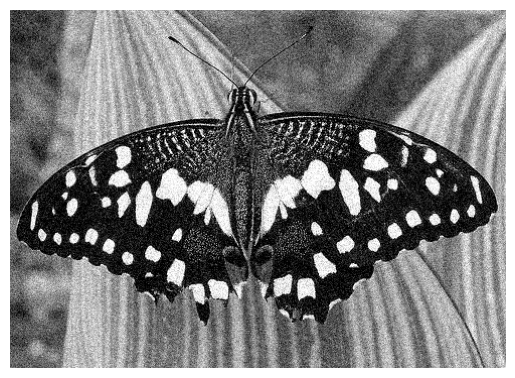

In [51]:
# code goes here
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

<a name="Compute-Peak-Signal-to-Noise-Ratio-(PSNR)"></a><h3>Compute Peak Signal to Noise Ratio (PSNR)</h3>


<b>Exercise 3.5. [2 Points]</b>

<b>Goal:</b> Compute the mean squared error (MSE) between the images.

<b>Task</b>
<ul>
<li>Use the <i><b>original</b></i> and <i><b>noisy</b></i> (from 3.3) images to compute the mean squared error between them.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>Use the <i><b>NumPy</b></i> library to perform this computation.</li>
</ul>

In [52]:
# code goes here
mse = np.mean((gray.astype(np.float32) - noisy_image.astype(np.float32)) ** 2)
print("MSE:", mse)

MSE: 435.1034


<b>Exercise 3.6. [4 Points]</b>

<b>Goal:</b> Compute the Peak Signal-to-Noise Ratio (PSNR).

<b>Task</b>
<ul>
<li>Compute the Peak Signal-to-Noise Ratio (PSNR) using base 10.</li>
<li>Calculate the square root of the MSE obtained from Exercise 3.5.</li>
<li>Print the PSNR value.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The maximum value should be 255.0.</li>
</ul>

In [53]:
# code goes here
MAX = 255.0
rmse = np.sqrt(mse) 
psnr = 20 * np.log10(MAX / rmse)
print("PSNR:", psnr, "dB")

PSNR: 21.744879 dB


<b>Exercise 3.7. [2 Points]</b>

<b>Goal:</b> Denoise the image using a Gaussian filter.

<b>Task</b>
<ul>
<li>Use the <i><b>GaussianBlur</b></i> function from the OpenCV library to denoise the image.</li>
<li>Set the kernel size to <i><b>3</b></i>.</li>
<li>Use the <i><b>plt.imshow</b></i> function to display the result.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>The <i><b>GaussianBlur</b></i> function is already imported in the first cell. Do not import it again.</li>
</ul>

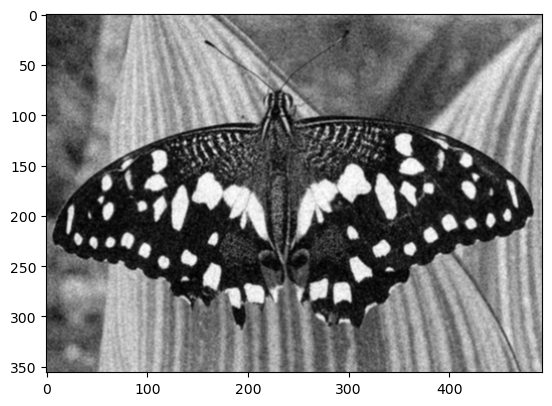

In [54]:
# code goes here
denoised = cv.GaussianBlur(noisy_image, (3, 3), 0)
plt.imshow(denoised, cmap='gray')
plt.show()

<b>Exercise 3.8. [3 Points]</b>

<b>Goal:</b> Compute the PSNR after denoising.

<b>Task</b>
<ul>
<li>Compute the PSNR again and print the result for the denoised image from Exercise 3.7 and the original image.</li>
</ul>
        
<b>Hint</b>
<ul> 
<li>You need to use the original image defined in Exercise 3.1.</li>
</ul>

In [55]:
# code goes here
MAX = 255.0
rmse_denoised = np.sqrt(np.mean((gray.astype(np.float32) - denoised.astype(np.float32)) ** 2))
psnr_denoised = 20 * np.log10(MAX / rmse_denoised)
print("PSNR after denoising:", psnr_denoised, "dB")

PSNR after denoising: 23.33591 dB


<b>Exercise 3.9. [7 Points]</b>

<b>Question</b>
<ul> 

<li>Q1) In Exercise 3.7, What would happen if we apply GaussianBlur several times consecutively in terms of PSNR (does it go up or down)? Why?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) Applying GaussianBlur several times first increases PSNR because noise is reduced, but after more iterations PSNR decreases as real image details get blurred. So PSNR goes up at first, then down due to over-smoothing. 